# Predicting Prices of Bitcoin

About This database contains 2 attributes.
Attribute Information:

> 1.Date = format %Y-%m-%d %H:%M:%S

> 2.Price = Bitcoin Price

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
os.chdir("C:\\Users\\Basudev\\Downloads\\Bitcoin Prices")

In [2]:
df = pd.read_csv('BitcoinPrice.csv')

In [3]:
df.head()

,Date,Price
0,2018-08-25 00:00:00,6719.429231
1,2018-08-26 00:00:00,6673.274167
2,2018-08-27 00:00:00,6719.266154
3,2018-08-28 00:00:00,7000.040000
4,2018-08-29 00:00:00,7054.276429


In [4]:
df.tail()

,Date,Price
360,2019-08-20 00:00:00,10746.507692
361,2019-08-21 00:00:00,10169.094167
362,2019-08-22 00:00:00,10030.746667
363,2019-08-23 00:00:00,10255.977500
364,2019-08-24 00:00:00,10158.540833


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    365 non-null    object 
 1   Price   365 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


In [6]:
df.drop(['Date'], 1, inplace = True)

In [7]:
df.head()

,Price
0,6719.429231
1,6673.274167
2,6719.266154
3,7000.040000
4,7054.276429


In [8]:
#Predicting 30 Days in the Future
p_days = 30
df['Prediction'] = df[['Price']].shift(-p_days)

In [9]:
df.head()

,Price,Prediction
0,6719.429231,6639.304167
1,6673.274167,6412.459167
2,6719.266154,6468.631667
3,7000.040000,6535.476667
4,7054.276429,6677.342500


In [10]:
df.tail()

,Price,Prediction
360,10746.507692,NaN
361,10169.094167,NaN
362,10030.746667,NaN
363,10255.977500,NaN
364,10158.540833,NaN


In [11]:
#Separating X and Y
X = np.array(df.drop(['Prediction'], 1))
X = X[: len(df) - p_days]

In [12]:
X.shape

(335, 1)

In [13]:
X

array([[ 6719.42923077],
       [ 6673.27416667],
       [ 6719.26615385],
       [ 7000.04      ],
       [ 7054.27642857],
       [ 6932.6625    ],
       [ 6981.94615385],
       [ 7100.94666667],
       [ 7247.93538462],
       [ 7260.94923077],
       [ 7326.8525    ],
       [ 7113.06923077],
       [ 6433.27166667],
       [ 6444.80416667],
       [ 6366.1075    ],
       [ 6286.42583333],
       [ 6297.87769231],
       [ 6296.32083333],
       [ 6273.1375    ],
       [ 6450.17923077],
       [ 6499.0625    ],
       [ 6518.655     ],
       [ 6480.64416667],
       [ 6400.60083333],
       [ 6296.63166667],
       [ 6335.82666667],
       [ 6418.56266667],
       [ 6669.99083333],
       [ 6709.3125    ],
       [ 6710.445     ],
       [ 6639.30416667],
       [ 6412.45916667],
       [ 6468.63166667],
       [ 6535.47666667],
       [ 6677.3425    ],
       [ 6550.47416667],
       [ 6593.135     ],
       [ 6590.96833333],
       [ 6562.64166667],
       [ 6470.4025    ],


In [14]:
Y = np.array(df['Prediction'])
Y = Y[: -p_days]

In [15]:
Y.shape

(335,)

In [16]:
Y

array([ 6639.30416667,  6412.45916667,  6468.63166667,  6535.47666667,
        6677.3425    ,  6550.47416667,  6593.135     ,  6590.96833333,
        6562.64166667,  6470.4025    ,  6563.62833333,  6568.54916667,
        6581.48666667,  6558.5375    ,  6618.56769231,  6621.71166667,
        6563.00916667,  6248.63583333,  6260.53083333,  6260.64583333,
        6299.39916667,  6452.57166667,  6596.61833333,  6596.27615385,
        6568.04076923,  6487.44416667,  6488.82583333,  6531.60166667,
        6498.48583333,  6481.426     ,  6508.31      ,  6478.0825    ,
        6473.75333333,  6465.9175    ,  6448.22166667,  6382.66833333,
        6309.45285714,  6310.28416667,  6342.28083333,  6387.67416667,
        6363.79583333,  6391.87333333,  6436.965     ,  6445.35416667,
        6538.79      ,  6486.25166667,  6411.28083333,  6399.03333333,
        6378.26833333,  6401.93666667,  6372.06333333,  6176.155     ,
        5615.18      ,  5596.1925    ,  5558.24333333,  5606.04416667,
      

In [17]:
#Splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)
P_days_array = np.array(df.drop(['Prediction'], 1))[p_days :]
P_days_array

array([[ 6639.30416667],
       [ 6412.45916667],
       [ 6468.63166667],
       [ 6535.47666667],
       [ 6677.3425    ],
       [ 6550.47416667],
       [ 6593.135     ],
       [ 6590.96833333],
       [ 6562.64166667],
       [ 6470.4025    ],
       [ 6563.62833333],
       [ 6568.54916667],
       [ 6581.48666667],
       [ 6558.5375    ],
       [ 6618.56769231],
       [ 6621.71166667],
       [ 6563.00916667],
       [ 6248.63583333],
       [ 6260.53083333],
       [ 6260.64583333],
       [ 6299.39916667],
       [ 6452.57166667],
       [ 6596.61833333],
       [ 6596.27615385],
       [ 6568.04076923],
       [ 6487.44416667],
       [ 6488.82583333],
       [ 6531.60166667],
       [ 6498.48583333],
       [ 6481.426     ],
       [ 6508.31      ],
       [ 6478.0825    ],
       [ 6473.75333333],
       [ 6465.9175    ],
       [ 6448.22166667],
       [ 6382.66833333],
       [ 6309.45285714],
       [ 6310.28416667],
       [ 6342.28083333],
       [ 6387.67416667],


SLR Accuracy: 0.61%


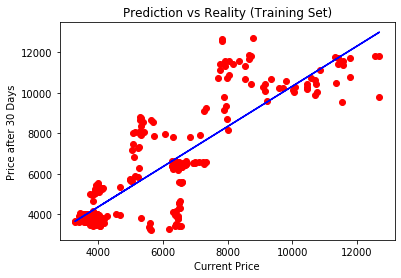

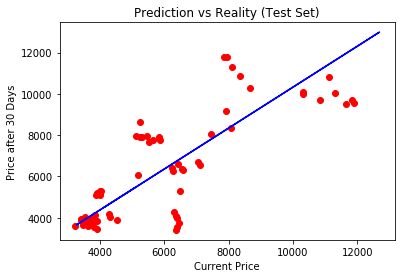

In [18]:
#Fitting Simple Linear Regression to the Training Set
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
slr = LinearRegression()
slr.fit(X_train, y_train)

#Predicting the Test Set Results
y_pred = slr.predict(X_test)
print("SLR Accuracy: {:.2f}%".format(slr.score(X_test, y_test)))

#Visualizing the Training Set Results
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, slr.predict(X_train), color = 'blue')
plt.title('Prediction vs Reality (Training Set)')
plt.xlabel('Current Price')
plt.ylabel('Price after 30 Days')
plt.show()

#Visualizing the Test Set Results
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, slr.predict(X_train), color = 'blue')
plt.title('Prediction vs Reality (Test Set)')
plt.xlabel('Current Price')
plt.ylabel('Price after 30 Days')
plt.show()

SVM Accuracy: -0.05%


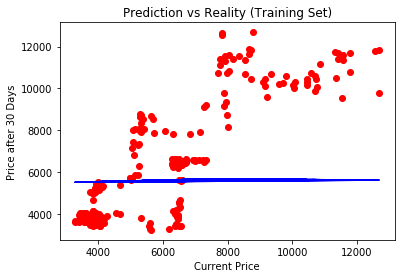

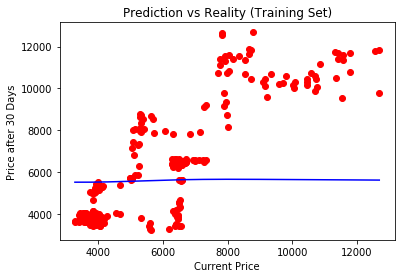

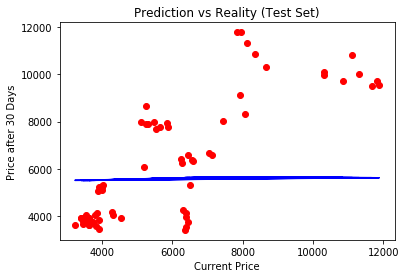

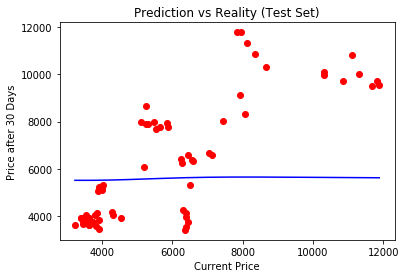

In [19]:
#Fitting SVR to the Dataset
from sklearn.svm import SVR
svr = SVR(kernel = 'rbf')
svr.fit(X_train, y_train)

y_pred = svr.predict(X_test)
print("SVM Accuracy: {:.2f}%".format(svr.score(X_test, y_test)))

#Visualising the SVR results 
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, svr.predict(X_train), color = 'blue')
plt.title('Prediction vs Reality (Training Set)')
plt.xlabel('Current Price')
plt.ylabel('Price after 30 Days')
plt.show()

#Visualising the SVR results (for higher resolution and smoother curve)
X_grid = np.arange(min(X_train), max(X_train), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_grid, svr.predict(X_grid), color = 'blue')
plt.title('Prediction vs Reality (Training Set)')
plt.xlabel('Current Price')
plt.ylabel('Price after 30 Days')
plt.show()

#Visualising the SVR results
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, svr.predict(X_test), color = 'blue')
plt.title('Prediction vs Reality (Test Set)')
plt.xlabel('Current Price')
plt.ylabel('Price after 30 Days')
plt.show()

#Visualising the SVR results (for higher resolution and smoother curve)
X_grid = np.arange(min(X_test), max(X_test), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_grid, svr.predict(X_grid), color = 'blue')
plt.title('Prediction vs Reality (Test Set)')
plt.xlabel('Current Price')
plt.ylabel('Price after 30 Days')
plt.show()

Decision Tree Accuracy: 0.72%


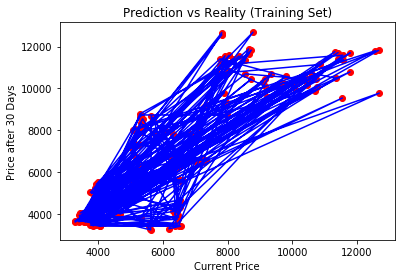

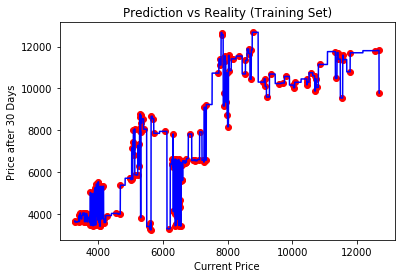

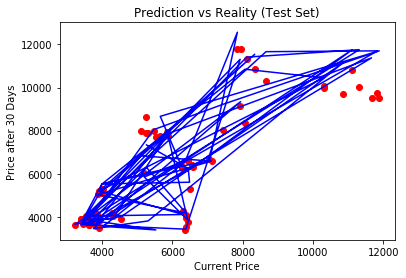

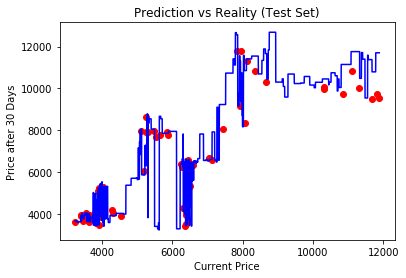

In [20]:
#Fitting Decision Tree Regression to the Dataset
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state = 42)
dtr.fit(X_train, y_train)

y_pred = dtr.predict(X_test)
print("Decision Tree Accuracy: {:.2f}%".format(dtr.score(X_test, y_test)))

#Visualising the Decision Tree Regression results
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, dtr.predict(X_train), color = 'blue')
plt.title('Prediction vs Reality (Training Set)')
plt.xlabel('Current Price')
plt.ylabel('Price after 30 Days')
plt.show()

#Visualising the Decision Tree Regression results (for higher resolution and smoother curve)
X_grid = np.arange(min(X_train), max(X_train), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_grid, dtr.predict(X_grid), color = 'blue')
plt.title('Prediction vs Reality (Training Set)')
plt.xlabel('Current Price')
plt.ylabel('Price after 30 Days')
plt.show()

#Visualising the Decision Tree Regression results
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, dtr.predict(X_test), color = 'blue')
plt.title('Prediction vs Reality (Test Set)')
plt.xlabel('Current Price')
plt.ylabel('Price after 30 Days')
plt.show()

#Visualising the Decision Tree Regression results (for higher resolution and smoother curve)
X_grid = np.arange(min(X_test), max(X_test), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_grid, dtr.predict(X_grid), color = 'blue')
plt.title('Prediction vs Reality (Test Set)')
plt.xlabel('Current Price')
plt.ylabel('Price after 30 Days')
plt.show()



Random Forest Accuracy: 0.81%


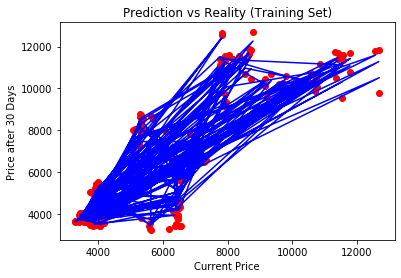

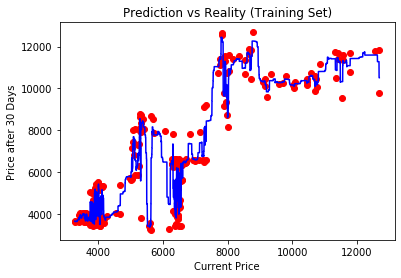

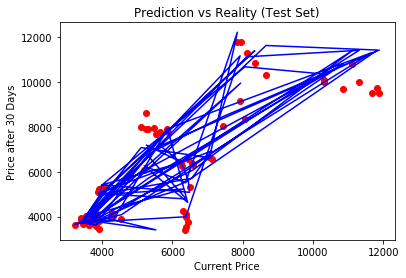

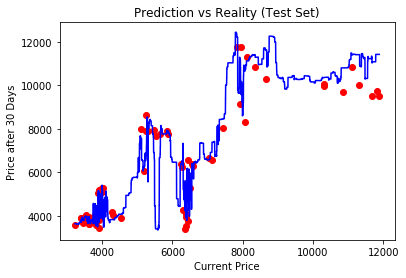

In [21]:
#Fitting Random Forest Regression to the Dataset
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 300, random_state = 42)
rfr.fit(X_train, y_train)

y_pred = rfr.predict(X_test)
print("Random Forest Accuracy: {:.2f}%".format(rfr.score(X_test, y_test)))

#Visualising the Random Forest Regression results
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, rfr.predict(X_train), color = 'blue')
plt.title('Prediction vs Reality (Training Set)')
plt.xlabel('Current Price')
plt.ylabel('Price after 30 Days')
plt.show()

#Visualising the Random Forest Regression results (for higher resolution and smoother curve)
X_grid = np.arange(min(X_train), max(X_train), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_grid, rfr.predict(X_grid), color = 'blue')
plt.title('Prediction vs Reality (Training Set)')
plt.xlabel('Current Price')
plt.ylabel('Price after 30 Days')
plt.show()

#Visualising the Random Forest Regression results
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, rfr.predict(X_test), color = 'blue')
plt.title('Prediction vs Reality (Test Set)')
plt.xlabel('Current Price')
plt.ylabel('Price after 30 Days')
plt.show()

#Visualising the Random Forest Regression results (for higher resolution and smoother curve)
X_grid = np.arange(min(X_test), max(X_test), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_grid, rfr.predict(X_grid), color = 'blue')
plt.title('Prediction vs Reality (Test Set)')
plt.xlabel('Current Price')
plt.ylabel('Price after 30 Days')
plt.show()